In [1]:
#fonte: https://dados.gov.br/dados/conjuntos-dados/bolsa-familia

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("/content/dados_bf_2024.csv")
df_distritos = pd.read_csv("/content/RELATORIO_DTB_BRASIL_2024_DISTRITOS - DTB_Distritos.csv")

In [3]:
df.head()

,codigo_ibge,anomes_s,qtd_familias_beneficiarias_bolsa_familia_s,valor_repassado_bolsa_familia_s,pbf_vlr_medio_benef_f
0,110001,202510,1583,1072689.0,681.94
1,110002,202510,6971,4678113.0,677.69
2,110003,202510,304,208621.0,686.25
3,110004,202510,5540,3657564.0,660.33
4,110005,202510,1127,767009.0,682.39


In [4]:
df_distritos.head()

,UF,Nome_UF,Região Geográfica Intermediária,Nome Região Geográfica Intermediária,Região Geográfica Imediata,Nome Região Geográfica Imediata,Município,Código Município Completo,Nome_Município,Distrito,...,Nome_Distrito.1,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24
0,11,Rondônia,1102,Ji-Paraná,110005,Cacoal,15,1100015,Alta Floresta D'Oeste,5,...,Alta Floresta D'Oeste,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,11,Rondônia,1102,Ji-Paraná,110005,Cacoal,15,1100015,Alta Floresta D'Oeste,15,...,Filadélfia d'Oeste,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,11,Rondônia,1102,Ji-Paraná,110005,Cacoal,15,1100015,Alta Floresta D'Oeste,20,...,Izidolândia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,11,Rondônia,1102,Ji-Paraná,110005,Cacoal,15,1100015,Alta Floresta D'Oeste,25,...,Nova Gease d'Oeste,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,11,Rondônia,1102,Ji-Paraná,110005,Cacoal,15,1100015,Alta Floresta D'Oeste,30,...,Rolim de Moura do Guaporé,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
drop = ['OBS','Unnamed: 13','Unnamed: 16','Unnamed: 17','Unnamed: 18','Unnamed: 19','Unnamed: 20','Unnamed: 21','Unnamed: 22','Unnamed: 23','Unnamed: 24']
df_distritos = df_distritos.drop(columns=drop)

df_distritos['Código Município'] = df_distritos['Código Município Completo'].astype(str).str[:6]
df_distritos.head()


,UF,Nome_UF,Região Geográfica Intermediária,Nome Região Geográfica Intermediária,Região Geográfica Imediata,Nome Região Geográfica Imediata,Município,Código Município Completo,Nome_Município,Distrito,Código de Distrito Completo,Nome_Distrito,Código de Distrito Completo.1,Nome_Distrito.1,Código Município
0,11,Rondônia,1102,Ji-Paraná,110005,Cacoal,15,1100015,Alta Floresta D'Oeste,5,110001505,Alta Floresta D'Oeste,110001505.0,Alta Floresta D'Oeste,110001
1,11,Rondônia,1102,Ji-Paraná,110005,Cacoal,15,1100015,Alta Floresta D'Oeste,15,110001515,Filadélfia d'Oeste,110001515.0,Filadélfia d'Oeste,110001
2,11,Rondônia,1102,Ji-Paraná,110005,Cacoal,15,1100015,Alta Floresta D'Oeste,20,110001520,Izidolândia,110001520.0,Izidolândia,110001
3,11,Rondônia,1102,Ji-Paraná,110005,Cacoal,15,1100015,Alta Floresta D'Oeste,25,110001525,Nova Gease d'Oeste,110001525.0,Nova Gease d'Oeste,110001
4,11,Rondônia,1102,Ji-Paraná,110005,Cacoal,15,1100015,Alta Floresta D'Oeste,30,110001530,Rolim de Moura do Guaporé,110001530.0,Rolim de Moura do Guaporé,110001


In [6]:
mapa_municipios = df_distritos.set_index('Código Município')['Nome_Município'].to_dict()
df['municipio'] = df['codigo_ibge'].astype(str).map(mapa_municipios)
df.head()

,codigo_ibge,anomes_s,qtd_familias_beneficiarias_bolsa_familia_s,valor_repassado_bolsa_familia_s,pbf_vlr_medio_benef_f,municipio
0,110001,202510,1583,1072689.0,681.94,Alta Floresta D'Oeste
1,110002,202510,6971,4678113.0,677.69,Ariquemes
2,110003,202510,304,208621.0,686.25,Cabixi
3,110004,202510,5540,3657564.0,660.33,Cacoal
4,110005,202510,1127,767009.0,682.39,Cerejeiras


In [7]:
df.shape

(55700, 6)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55700 entries, 0 to 55699
Data columns (total 6 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   codigo_ibge                                 55700 non-null  int64  
 1   anomes_s                                    55700 non-null  int64  
 2   qtd_familias_beneficiarias_bolsa_familia_s  55700 non-null  int64  
 3   valor_repassado_bolsa_familia_s             55700 non-null  float64
 4   pbf_vlr_medio_benef_f                       55700 non-null  float64
 5   municipio                                   55700 non-null  object 
dtypes: float64(2), int64(3), object(1)
memory usage: 2.5+ MB


In [9]:
df['ano'] = df['anomes_s'].astype(str).str[:4]
df['mes'] = df['anomes_s'].astype(str).str[4:]
df = df.drop(columns='anomes_s')

In [10]:
df.head()

,codigo_ibge,qtd_familias_beneficiarias_bolsa_familia_s,valor_repassado_bolsa_familia_s,pbf_vlr_medio_benef_f,municipio,ano,mes
0,110001,1583,1072689.0,681.94,Alta Floresta D'Oeste,2025,10
1,110002,6971,4678113.0,677.69,Ariquemes,2025,10
2,110003,304,208621.0,686.25,Cabixi,2025,10
3,110004,5540,3657564.0,660.33,Cacoal,2025,10
4,110005,1127,767009.0,682.39,Cerejeiras,2025,10


In [11]:
df_rj_sp = df.loc[(df['municipio'] == "Rio de Janeiro") | (df['municipio'] == "São Paulo") ]
media_rj_sp = df_rj_sp.groupby('municipio')['pbf_vlr_medio_benef_f'].mean().reset_index()
print("Media Bolsa Família para Rio de Janeiro e São Paulo:")
media_rj_sp

Media Bolsa Família para Rio de Janeiro e São Paulo:


,municipio,pbf_vlr_medio_benef_f
0,Rio de Janeiro,664.107
1,São Paulo,659.503


In [12]:

df.head()

,codigo_ibge,qtd_familias_beneficiarias_bolsa_familia_s,valor_repassado_bolsa_familia_s,pbf_vlr_medio_benef_f,municipio,ano,mes
0,110001,1583,1072689.0,681.94,Alta Floresta D'Oeste,2025,10
1,110002,6971,4678113.0,677.69,Ariquemes,2025,10
2,110003,304,208621.0,686.25,Cabixi,2025,10
3,110004,5540,3657564.0,660.33,Cacoal,2025,10
4,110005,1127,767009.0,682.39,Cerejeiras,2025,10


In [13]:
df.groupby('municipio')['pbf_vlr_medio_benef_f'].mean().reset_index().sort_values(by='pbf_vlr_medio_benef_f', ascending=False)

,municipio,pbf_vlr_medio_benef_f
5068,Uiramutã,1025.660
863,Campinápolis,914.994
4228,Santa Rosa do Purus,887.602
2449,Jordão,879.555
4304,Santo Antônio do Içá,878.944
...,...,...
493,Barão,532.659
1024,Carmo do Rio Claro,528.149
4821,Sério,517.931
1265,Cordeirópolis,512.215


In [14]:
df_juizdefora = df.loc[df['municipio'] == 'Juiz de Fora'][['qtd_familias_beneficiarias_bolsa_familia_s','pbf_vlr_medio_benef_f','mes']].sort_values(by='mes', ascending=True).reset_index(drop=True)
df_juizdefora.set_index(['mes','qtd_familias_beneficiarias_bolsa_familia_s','pbf_vlr_medio_benef_f'], inplace=True)
df_juizdefora

,,
mes,qtd_familias_beneficiarias_bolsa_familia_s,pbf_vlr_medio_benef_f
01,26254,659.75
02,26223,659.44
03,26885,657.10
04,26801,657.80
05,26772,657.62
06,26926,656.14
07,25228,662.16
08,24180,664.02
09,23730,673.85


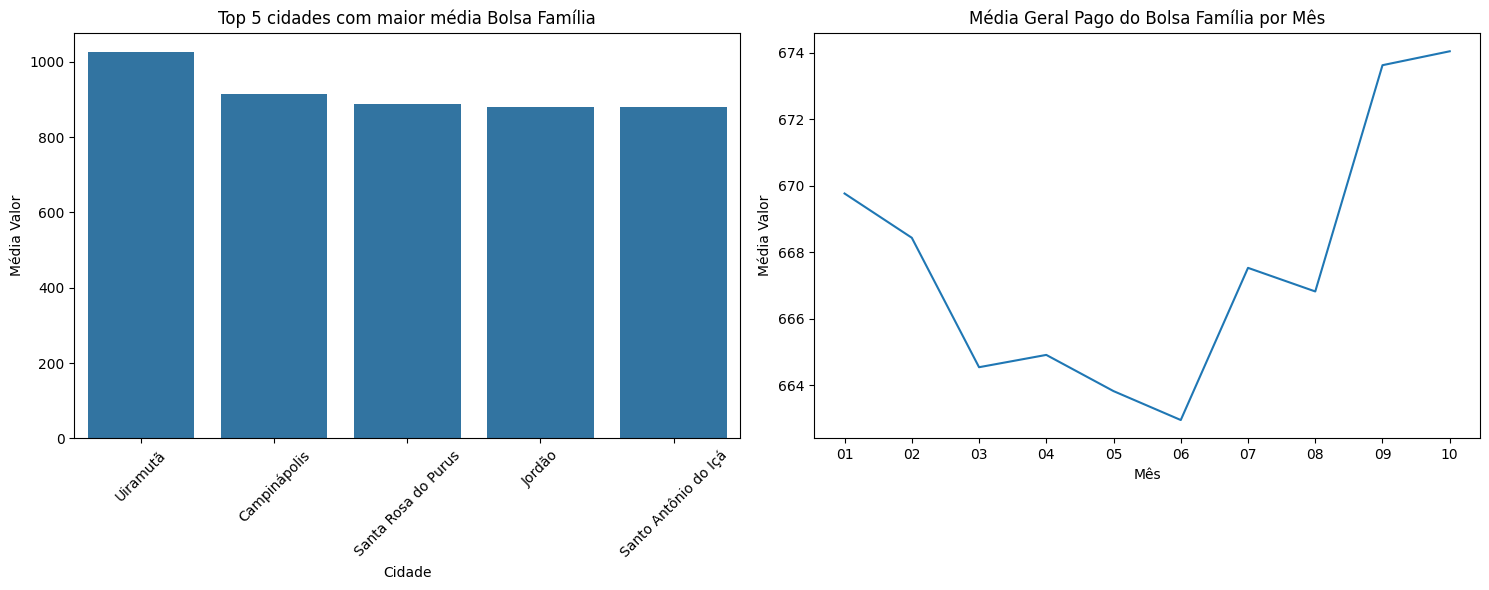

In [26]:
valor_medio_por_mes = df.groupby(['mes'])['pbf_vlr_medio_benef_f'].mean().reset_index()
municipios_maior_valor = df.groupby('municipio')['pbf_vlr_medio_benef_f'].mean().reset_index().sort_values(by='pbf_vlr_medio_benef_f', ascending=False).head()

fig, (ax1,ax2) = plt.subplots(1,2, figsize=(15, 6))

sns.barplot(x=municipios_maior_valor['municipio'], y=municipios_maior_valor['pbf_vlr_medio_benef_f'], ax=ax1)
ax1.set_title('Top 5 cidades com maior média Bolsa Família')
ax1.set_xlabel('Cidade')
ax1.set_ylabel('Média Valor')
ax1.tick_params(axis='x', rotation=45)


sns.lineplot(x=valor_medio_por_mes.mes, y=valor_medio_por_mes['pbf_vlr_medio_benef_f'], ax=ax2)
ax2.set_title('Média Geral Pago do Bolsa Família por Mês')
ax2.set_xlabel('Mês')
ax2.set_ylabel('Média Valor')


plt.tight_layout()
plt.show()

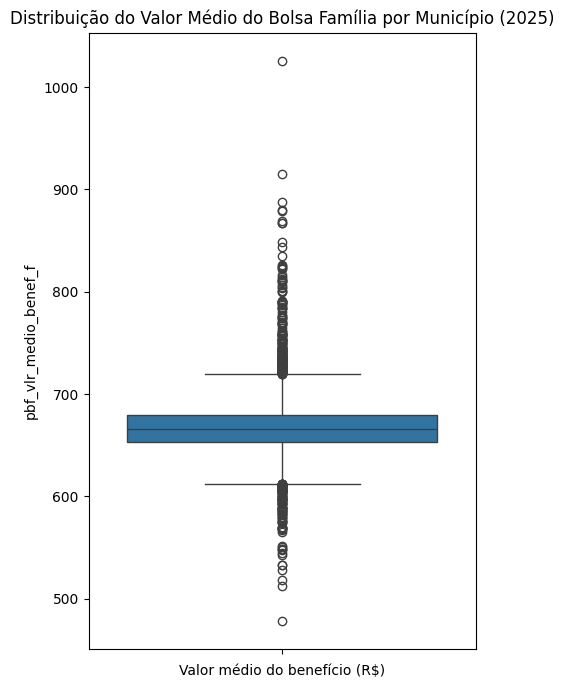

In [16]:
media_por_cidade = df.groupby('municipio')['pbf_vlr_medio_benef_f'].mean().reset_index()
plt.figure(figsize=(5,8))
sns.boxplot(data=media_por_cidade, y='pbf_vlr_medio_benef_f')
plt.title('Distribuição do Valor Médio do Bolsa Família por Município (2025)')
plt.xlabel('Valor médio do benefício (R$)')
plt.show()


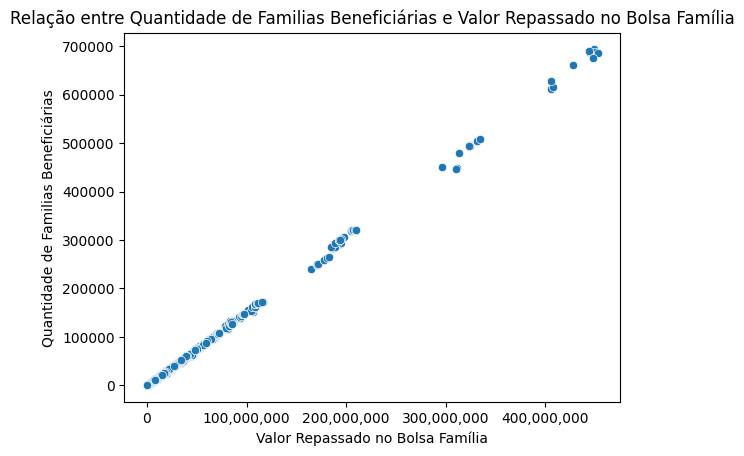

In [17]:
import matplotlib.ticker as mticker

sns.scatterplot(data=df, x='valor_repassado_bolsa_familia_s', y='qtd_familias_beneficiarias_bolsa_familia_s')
plt.title('Relação entre Quantidade de Familias Beneficiárias e Valor Repassado no Bolsa Família')
plt.xlabel('Valor Repassado no Bolsa Família')
plt.ylabel('Quantidade de Familias Beneficiárias')

# Format x-axis labels to avoid scientific notation
formatter = mticker.FuncFormatter(lambda x, _: '{:,.0f}'.format(x))
plt.gca().xaxis.set_major_formatter(formatter)

plt.show()